In [ ]:
# We install the tracr library

!git clone https://github.com/deepmind/tracr
%cd tracr
!pip install .

from tracr.rasp import rasp

Cloning into 'tracr'...
remote: Enumerating objects: 179, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 179 (delta 38), reused 37 (delta 21), pack-reused 109
Receiving objects: 100% (179/179), 133.96 KiB | 2.23 MiB/s, done.
Resolving deltas: 100% (89/89), done.


In [ ]:
# I'm not completely sure what this function does

def make_length():
  all_true_selector = rasp.Select(rasp.tokens, rasp.tokens, rasp.Comparison.TRUE)
  return rasp.SelectorWidth(all_true_selector)


In [ ]:
# We make the 'reverse string' function in RASP

length = make_length() 
opp_index = length - rasp.indices - 1
flip = rasp.Select(rasp.indices, opp_index, rasp.Comparison.EQ)
reverse = rasp.Aggregate(flip, rasp.tokens)


In [ ]:
# We compile the RASP program to a Transformer. We need a Beginning of String (BOS) token.

from tracr.compiler import compiling
bos = "BOS"
model = compiling.compile_rasp_to_model(
    reverse,
    vocab={1, 2, 3},
    max_seq_len=3,
    compiler_bos=bos,
)

In [ ]:
# Let's see if our transformer works..

out = model.apply([bos, 1, 2, 3])
print(out.decoded)

out = model.apply([bos, 2, 2, 3])
print(out.decoded)

['BOS', 3, 2, 1]
['BOS', 3, 2, 2]


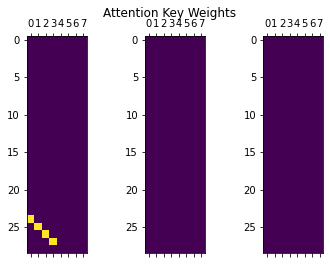

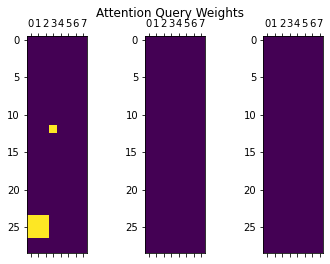

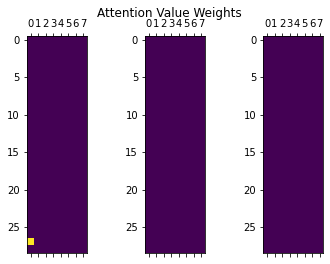

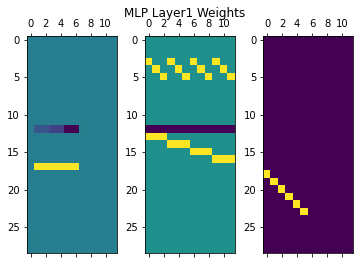

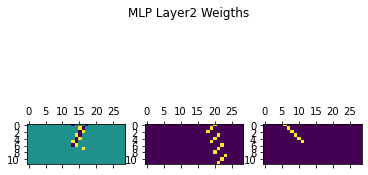

In [ ]:
# Now we can inspect the weights of our Transformer!

from pprint import pprint
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3)
fig.suptitle("Attention Key Weights")
ax[0].matshow(model.params['transformer/layer_0/attn/key']['w'])
ax[1].matshow(model.params['transformer/layer_1/attn/key']['w'])
ax[2].matshow(model.params['transformer/layer_2/attn/key']['w'])
plt.show()

fig, ax = plt.subplots(1, 3)
fig.suptitle("Attention Query Weights")
ax[0].matshow(model.params['transformer/layer_0/attn/query']['w'])
ax[1].matshow(model.params['transformer/layer_1/attn/query']['w'])
ax[2].matshow(model.params['transformer/layer_2/attn/query']['w'])
plt.show()


fig, ax = plt.subplots(1, 3)
fig.suptitle("Attention Value Weights")
ax[0].matshow(model.params['transformer/layer_0/attn/value']['w'])
ax[1].matshow(model.params['transformer/layer_1/attn/value']['w'])
ax[2].matshow(model.params['transformer/layer_2/attn/value']['w'])
plt.show()


fig, ax = plt.subplots(1, 3)
fig.suptitle("MLP Layer1 Weights")
ax[0].matshow(model.params['transformer/layer_0/mlp/linear_1']['w'])
ax[1].matshow(model.params['transformer/layer_1/mlp/linear_1']['w'])
ax[2].matshow(model.params['transformer/layer_2/mlp/linear_1']['w'])
plt.show()


fig, ax = plt.subplots(1, 3)
fig.suptitle("MLP Layer2 Weigths")
ax[0].matshow(model.params['transformer/layer_0/mlp/linear_2']['w'])
ax[1].matshow(model.params['transformer/layer_1/mlp/linear_2']['w'])
ax[2].matshow(model.params['transformer/layer_2/mlp/linear_2']['w'])
plt.show()
